In [ ]:
# TASK 1: Data Exploration and Preprocessing

In [1]:
import pandas as pd

df=pd.read_csv("C:/Users/sapna/Downloads/Dataset  (1).csv")


In [2]:
print(df)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [3]:
# Remove rows where any cell contains the replacement character �
df = df[~df.astype(str).apply(lambda x: x.str.contains('�')).any(axis=1)]

print(df)

      Restaurant ID            Restaurant Name  Country Code  \
0           6317637           Le Petit Souffle           162   
1           6304287           Izakaya Kikufuji           162   
2           6300002     Heat - Edsa Shangri-La           162   
3           6318506                       Ooma           162   
4           6314302                Sambo Kojin           162   
...             ...                        ...           ...   
9512        5800710  The Manhattan Fish Market           191   
9513        5800433                 The Sizzle           191   
9514        5800176           Ministry of Crab           191   
9515        5801321               Cafe Beverly           191   
9516        5800612              Burger's King           191   

                  City                                            Address  \
0          Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1          Makati City  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   


In [4]:
# identify the number of rows and columns
df=df.dropna(axis=0)
df.shape

(9296, 21)

In [5]:
# Convert "Aggregate rating" to numeric
import pandas as pd

df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')


In [7]:
print("Missing values:", df['Aggregate rating'].isna().sum())


Missing values: 0


In [6]:
# check datatype
print("Data type:", df['Aggregate rating'].dtype)


Data type: float64


In [8]:
df['Aggregate rating'] = df['Aggregate rating'].astype('int')
df['Aggregate rating'].dtypes

dtype('int32')

In [9]:
# Analyze distribution of "Aggregate rating"
print(df['Aggregate rating'].value_counts().sort_index())


Aggregate rating
0    2134
1       3
2    1425
3    4490
4    1244
Name: count, dtype: int64


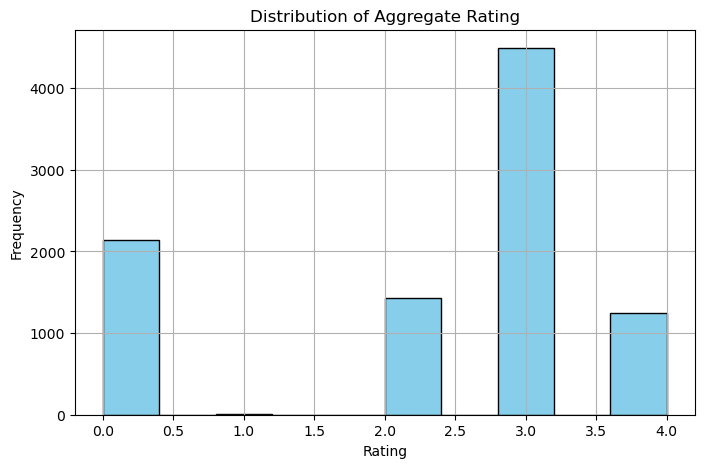

In [11]:
# visualise the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['Aggregate rating'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [13]:
# here we identify class imbalances
rating_counts = df['Aggregate rating'].value_counts()
print(rating_counts)

Aggregate rating
3    4490
0    2134
2    1425
4    1244
1       3
Name: count, dtype: int64


In [ ]:
# TASK 2: Descriptive Analysis

In [12]:
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.296000e+03   9296.000000  9296.000000  9296.000000   
mean    9.056151e+06     15.773666    65.524196    25.815247   
std     8.862315e+06     52.719483    40.265917    10.217424   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.015315e+05      1.000000    77.086204    28.479253   
50%     4.000002e+06      1.000000    77.194924    28.570087   
75%     1.835499e+07      1.000000    77.283553    28.641756   
max     1.850065e+07    216.000000   174.832089    52.008289   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9296.000000  9296.000000       9296.000000   9296.000000  
mean            1224.085306     1.781734          2.291201    155.600151  
std            16339.974505     0.894075          1.360976    432.850303  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.000000      4.000000  
50%              420.000000     2.000000          3.000000     30.000000  
75%              700.000000     2.000000          3.000000    128.000000  
max           800000.000000     4.000000          4.000000  10934.000000

In [13]:
# Distribution (value counts) of Country Code
print("Country Code Distribution:\n", df['Country Code'].value_counts())

# Distribution of Cities
print("\nCity Distribution:\n", df['City'].value_counts())

# Distribution of Cuisines (Top 10 most frequent)
print("\nTop 10 Cuisines:\n", df['Cuisines'].value_counts().head(10))


Country Code Distribution:
 Country Code
1      8575
216     422
214      60
189      59
148      39
14       24
162      22
94       21
184      20
166      20
191      20
30       10
37        4
Name: count, dtype: int64

City Distribution:
 City
New Delhi        5433
Gurgaon          1107
Noida            1066
Faridabad         249
Ghaziabad          25
                 ... 
Mc Millan           1
Mayfield            1
Macedon             1
Lorn                1
Victor Harbor       1
Name: count, Length: 132, dtype: int64

Top 10 Cuisines:
 Cuisines
North Indian                      935
North Indian, Chinese             509
Chinese                           353
Fast Food                         350
North Indian, Mughlai             328
Cafe                              285
Bakery                            215
North Indian, Mughlai, Chinese    194
Bakery, Desserts                  166
Street Food                       149
Name: count, dtype: int64


In [14]:
 # Top Cities with Most Restaurants
top_cities = df['City'].value_counts().head(10)
print("\nTop 10 Cities with Most Restaurants:\n", top_cities)



Top 10 Cities with Most Restaurants:
 City
New Delhi       5433
Gurgaon         1107
Noida           1066
Faridabad        249
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Allahabad         20
Sioux City        20
Nashik            20
Name: count, dtype: int64


In [15]:
# Top Cuisines (By Number of Restaurants)
top_cuisines = df['Cuisines'].value_counts().head(10)
print("\nTop 10 Cuisines:\n", top_cuisines)



Top 10 Cuisines:
 Cuisines
North Indian                      935
North Indian, Chinese             509
Chinese                           353
Fast Food                         350
North Indian, Mughlai             328
Cafe                              285
Bakery                            215
North Indian, Mughlai, Chinese    194
Bakery, Desserts                  166
Street Food                       149
Name: count, dtype: int64


In [16]:
# Split the 'Cuisines' column into individual cuisine types
from collections import Counter

# Drop NaN and split the strings
cuisine_series = df['Cuisines'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
flat_list = [item for sublist in cuisine_series for item in sublist]

# Count individual cuisines
cuisine_counts = Counter(flat_list)
top_cuisines_split = pd.Series(cuisine_counts).sort_values(ascending=False).head(10)

print("\nTop 10 Cuisines (split):\n", top_cuisines_split)



Top 10 Cuisines (split):
 North Indian    3929
Chinese         2715
Fast Food       1971
Mughlai          985
Bakery           733
Italian          723
Continental      715
Cafe             653
South Indian     633
Desserts         631
dtype: int64


In [ ]:
# TASK 3:  Geospatial Analysis

In [17]:
# Visualize the locations of restaurants on a map
import folium

# Calculate the map center
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]

# Create the map
restaurant_map = folium.Map(location=map_center, zoom_start=2)

# Add restaurant locations as points
for lat, lon in zip(df['Latitude'], df['Longitude']):
    if pd.notna(lat) and pd.notna(lon):
        folium.CircleMarker(location=[lat, lon],
                            radius=2,
                            color='blue',
                            fill=True,
                            fill_opacity=0.5).add_to(restaurant_map)

# Display map (if using Jupyter Notebook)
restaurant_map


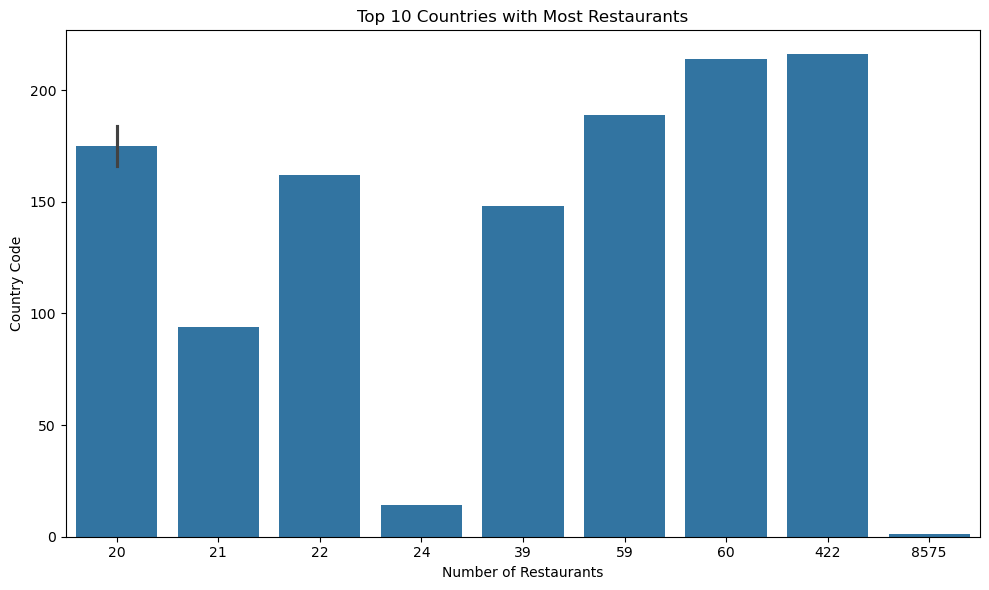

In [19]:
# Assuming df has 'Country Code', map it to country names if needed
country_distribution = df['Country Code'].value_counts().head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=country_distribution.values, y=country_distribution.index)
plt.title('Top 10 Countries with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Country Code')
plt.tight_layout()
plt.show()


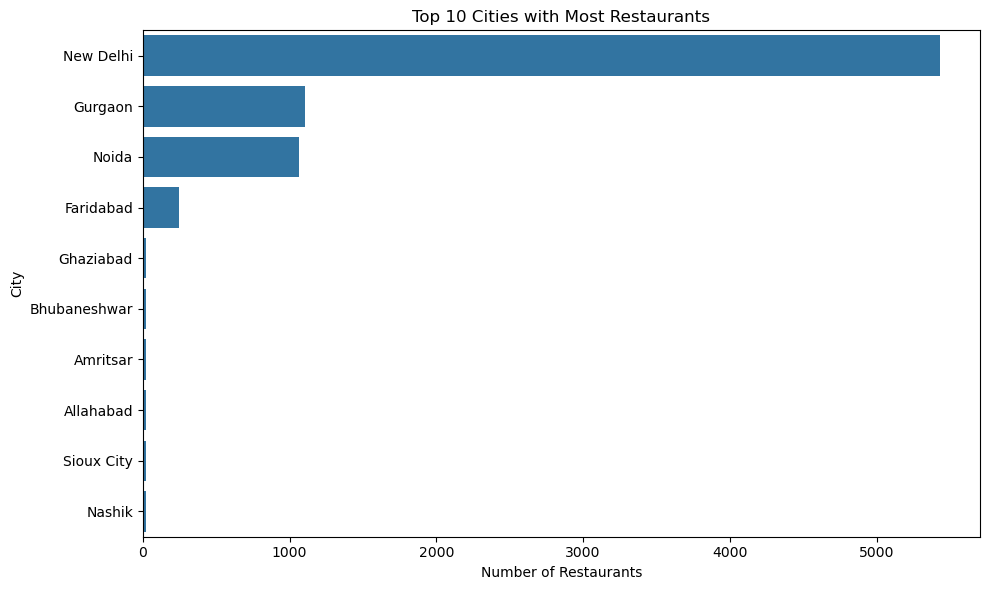

In [22]:
city_distribution = df['City'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=city_distribution.values, y=city_distribution.index, )
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.tight_layout()
plt.show()


In [28]:
#  Analyze Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Aggregate rating'].dropna(), bins=20, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()



In [27]:
# Check Correlation: Location vs Rating
avg_rating_by_country = df.groupby('Country Code')['Aggregate rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_country.index, y=avg_rating_by_country.values)
plt.title("Average Restaurant Rating by Country")
plt.xlabel("Country Code")
plt.ylabel("Average Rating")
plt.show()
